## imports

In [2]:
# from rnog_data.runtable import RunTable
# rnog_table = RunTable()
# rnog_table.get_table()
# rnog_table.get_table(stations=[23], start_time="2025-09-08 18:00:00", stop_time="2025-09-08 22:00:00")

In [1]:
# to read any rno-g data root file and plot waveforms and extract analysis variables such as snr
import sys, os, subprocess
import matplotlib.cm as cm
sys.path.append(os.path.abspath('/data/user/sanyukta/rno_code'))
from reading.data_reading import *
from functions.functions import *
# supress warnings
import warnings
warnings.filterwarnings("ignore")
mattak_kwargs = {
    "backend" : "uproot",
    # "backend" : "pyroot"
}


In [24]:
# constants
pa_chs = [0,1,2,3]
hpols = [8,4]
uvs = [5,6,7]
deep_chs = np.concatenate((pa_chs,hpols,uvs))
up_lpdas = [13,16,19]
down_lpdas = [12,14,15,16,17,18,20]
lpdas = np.concatenate((up_lpdas,down_lpdas)).sort()

data_path = '/data/user/sanyukta/rno_data/highwind'
files = [f for f in os.listdir(data_path) if f.endswith('.root')]
files.sort()
files

['station12_run250522_combined.root',
 'station12_run250523_combined.root',
 'station13_run251109_combined.root',
 'station13_run251110_combined.root',
 'station14_run250928_combined.root',
 'station14_run250929_combined.root',
 'station21_run251449_combined.root',
 'station21_run251450_combined.root',
 'station22_run251521_combined.root',
 'station22_run251522_combined.root',
 'station23_run251356_combined.root',
 'station24_run251515_combined.root',
 'station24_run251516_combined.root']

## reading root

In [23]:
run_types = ["physics"]
max_trigger_rate = 0  # in Hz, 0 means no cut on trigger rate
selectors = [lambda event_info : event_info.triggerType != "FORCE"] #remove forced trigger events

events = {}; times = {}; volts = {}; eve_times = {}
for f in files:
    input_dir = os.path.join(data_path, f)
    print(f'Processing file: {input_dir}')
    reader = basic_read_root(input_dir, mattak_kwargs=mattak_kwargs, selectors=selectors)
    events[f[13:-14]], times[f[13:-14]], volts[f[13:-14]] = get_eventsvoltstraces(reader, band_pass=0, pulse_filter=0, glitch_filter=1)
    eve_times[f[13:-14]] = get_event_info(reader)

Processing file: /data/user/sanyukta/rno_data/highwind/station12_run250522_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station12_run250522_combined.root ......


WARNING - 2025-10-21 16:03:38,857 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>60% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:38,912 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>120% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:38,944 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>180% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:38,958 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>160% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:38,997 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>245% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:39,012 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:39,051 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offse

Processing file: /data/user/sanyukta/rno_data/highwind/station12_run250523_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station12_run250523_combined.root ......


WARNING - 2025-10-21 16:03:40,778 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>118% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:40,801 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>188% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:40,832 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>145% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:40,854 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>110% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:40,877 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>148% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:40,892 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>138% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:40,906 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block off

Processing file: /data/user/sanyukta/rno_data/highwind/station13_run251109_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station13_run251109_combined.root ......


WARNING - 2025-10-21 16:03:45,711 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>231% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:45,726 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>282% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:45,734 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>58% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:45,746 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>169% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:45,754 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>264% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:45,766 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>84% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:45,780 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offse

Processing file: /data/user/sanyukta/rno_data/highwind/station13_run251110_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station13_run251110_combined.root ......


WARNING - 2025-10-21 16:03:48,016 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>309% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:48,024 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>126% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:48,037 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>200% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:48,051 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>232% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:48,081 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>51% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:48,095 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>146% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:48,109 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offs

Processing file: /data/user/sanyukta/rno_data/highwind/station14_run250928_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station14_run250928_combined.root ......
Processing file: /data/user/sanyukta/rno_data/highwind/station14_run250929_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station14_run250929_combined.root ......


WARNING - 2025-10-21 16:03:52,724 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>88% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:52,748 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>94% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:52,780 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>58% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:52,803 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>53% of Vrms), removing by fitting.


Processing file: /data/user/sanyukta/rno_data/highwind/station21_run251449_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station21_run251449_combined.root ......


WARNING - 2025-10-21 16:03:53,825 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>56% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:53,832 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>51% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:53,842 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>129% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:53,854 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>53% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:53,864 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>101% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:53,875 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>64% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:53,885 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets

Processing file: /data/user/sanyukta/rno_data/highwind/station21_run251450_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station21_run251450_combined.root ......


WARNING - 2025-10-21 16:03:57,513 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>62% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:57,521 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>60% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:57,527 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>55% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:57,537 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>108% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:57,549 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>67% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:57,556 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>79% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:03:57,566 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets 

Processing file: /data/user/sanyukta/rno_data/highwind/station22_run251521_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station22_run251521_combined.root ......


WARNING - 2025-10-21 16:04:03,143 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>55% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:03,151 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:03,158 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>75% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:03,170 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>83% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:03,179 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>75% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:03,185 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>68% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:03,198 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (

Processing file: /data/user/sanyukta/rno_data/highwind/station22_run251522_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station22_run251522_combined.root ......


WARNING - 2025-10-21 16:04:07,405 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>58% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:07,413 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>59% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:07,421 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>74% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:07,429 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>80% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:07,442 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>57% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:07,456 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:07,464 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (

Processing file: /data/user/sanyukta/rno_data/highwind/station23_run251356_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station23_run251356_combined.root ......
Processing file: /data/user/sanyukta/rno_data/highwind/station24_run251515_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station24_run251515_combined.root ......


WARNING - 2025-10-21 16:04:12,163 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:12,202 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>54% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:12,215 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:12,224 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>50% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:12,239 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>63% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:12,262 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>60% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:12,285 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (

Processing file: /data/user/sanyukta/rno_data/highwind/station24_run251516_combined.root

 reading /data/user/sanyukta/rno_data/highwind/station24_run251516_combined.root ......


WARNING - 2025-10-21 16:04:13,818 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>66% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:13,832 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>51% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:13,847 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>50% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:13,862 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>65% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:13,893 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>54% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:13,905 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>56% of Vrms), removing by fitting.
WARNING - 2025-10-21 16:04:13,912 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (

## plotting waveform

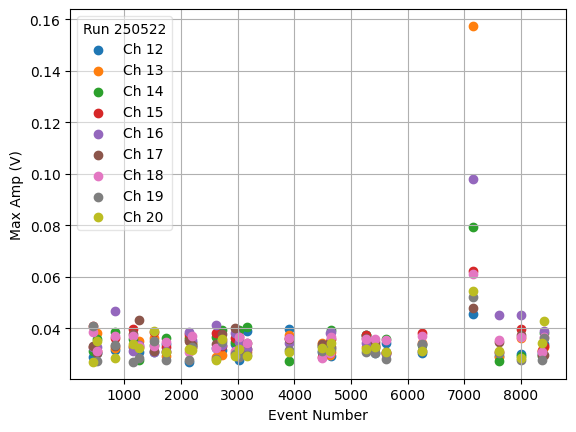

In [ ]:
runs = list(events.keys())
run_id = 1
for ch in lpdas:
    max_adc = [np.max(volts[runs[run_id]][eve][ch]) for eve in range(len(volts[runs[run_id]]))]
    plt.scatter(events[runs[run_id]], max_adc, label=f'Ch {ch}')
plt.xlabel('Event Number')
plt.ylabel('Max Amp (V)')
plt.legend(fancybox=True, framealpha=0.5, title=f'Run {runs[run_id]}')
plt.grid()
# plt.ylim(0,)

In [ ]:
# averaging wfs for all chs
avg_volt = {}
for run in events.keys():
    avg_volt[run] = {}
    for ch in deep_chs:
        avg_volt[run][ch] = align_and_average_voltage_traces([volts[run][event_id][ch] for event_id, event in enumerate(events[run])])

Plotting run: 250522
Plotting run: 250523
Plotting run: 251109
Plotting run: 251110
Plotting run: 250928
Plotting run: 250929
Plotting run: 251449
Plotting run: 251450
Plotting run: 251521
Plotting run: 251522
Plotting run: 251356
Plotting run: 251515
Plotting run: 251516


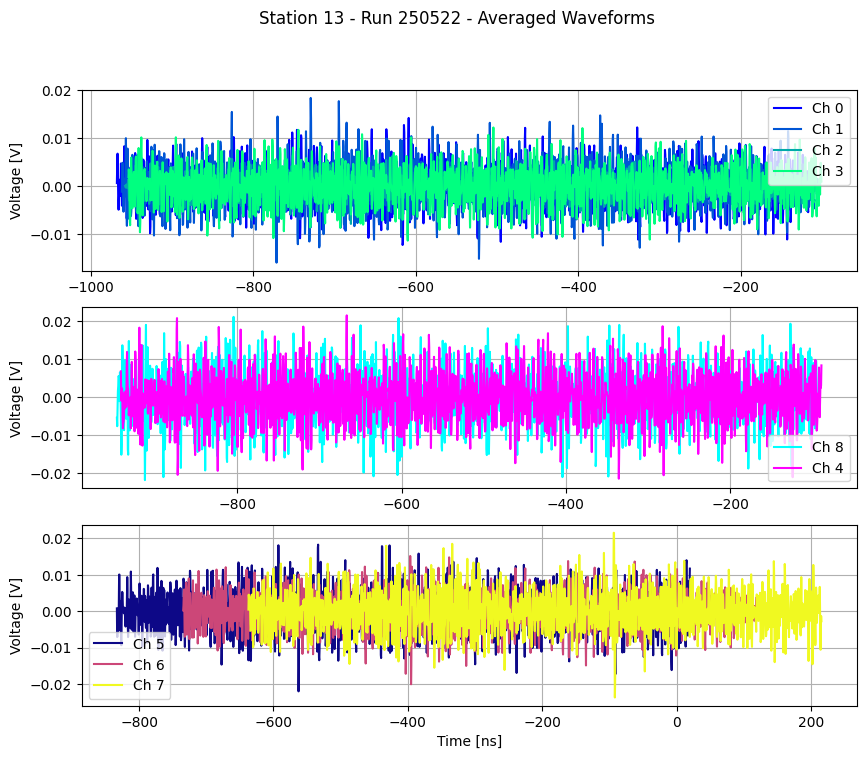

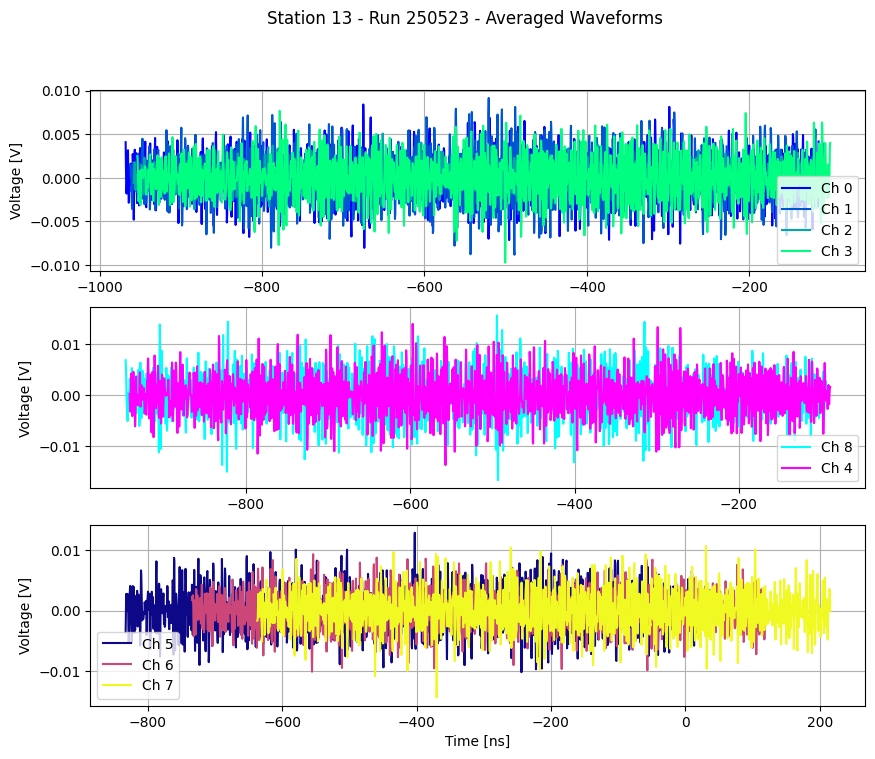

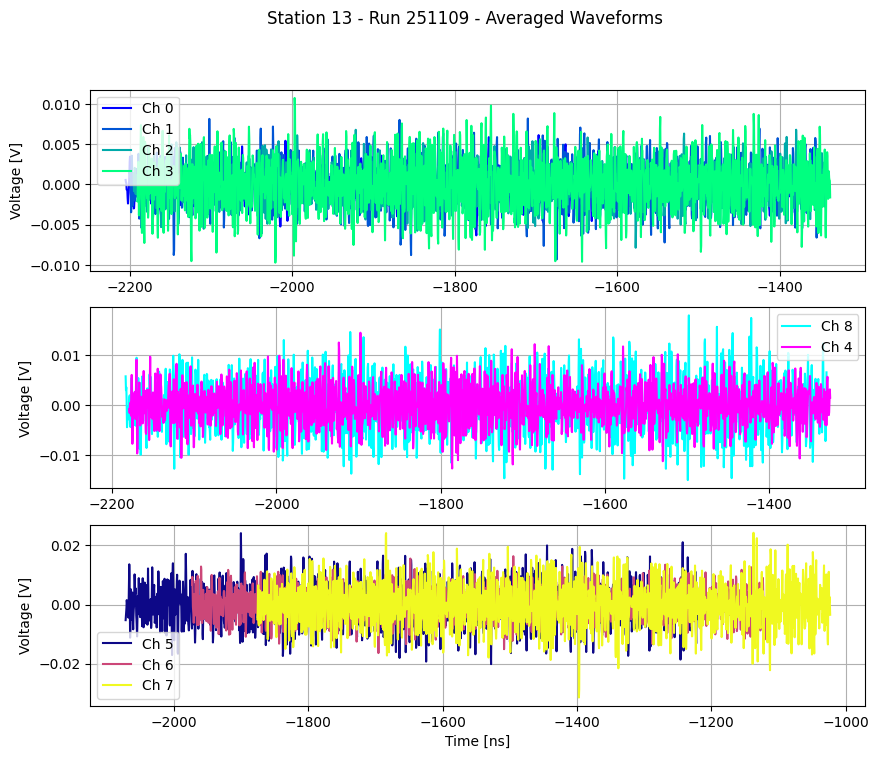

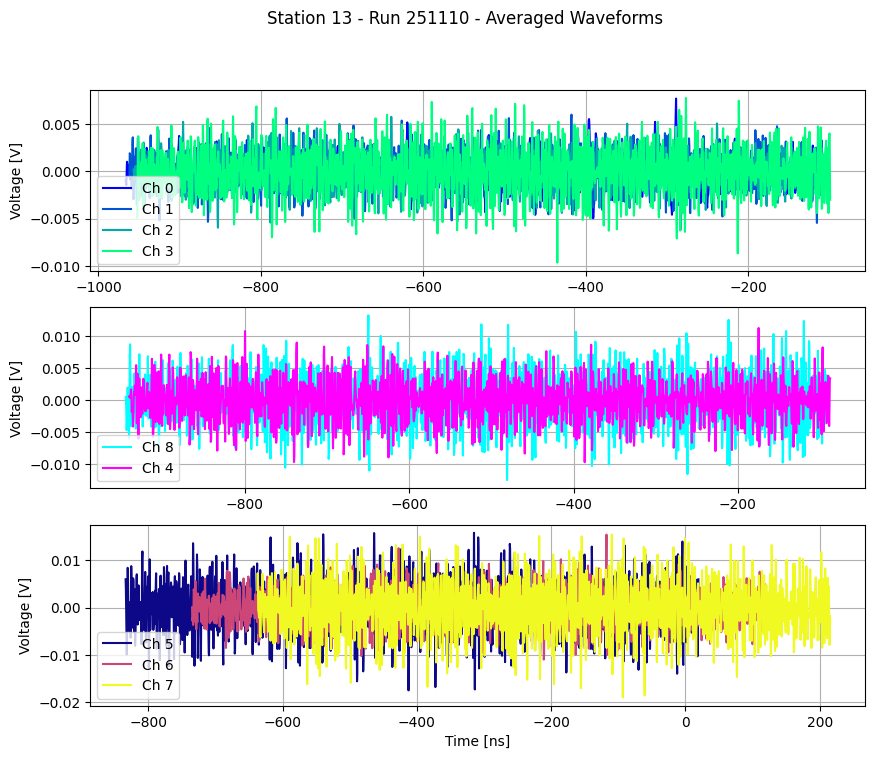

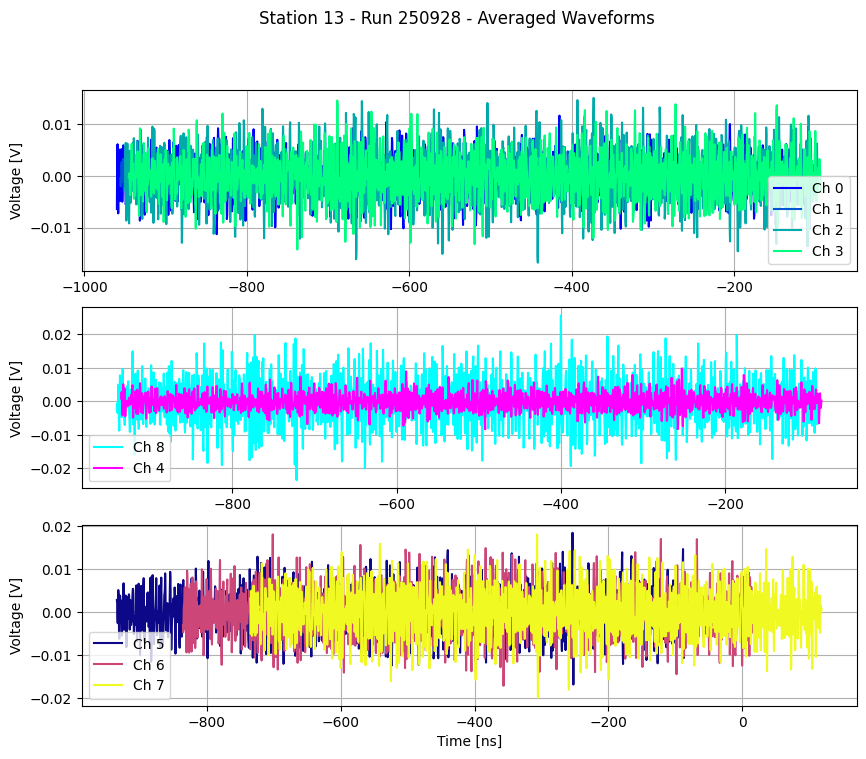

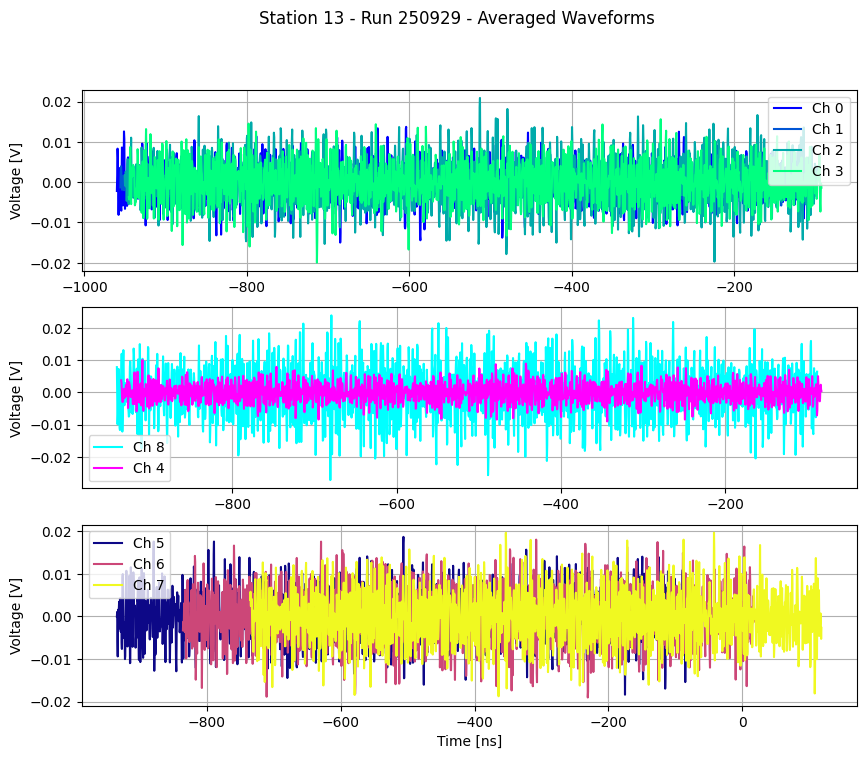

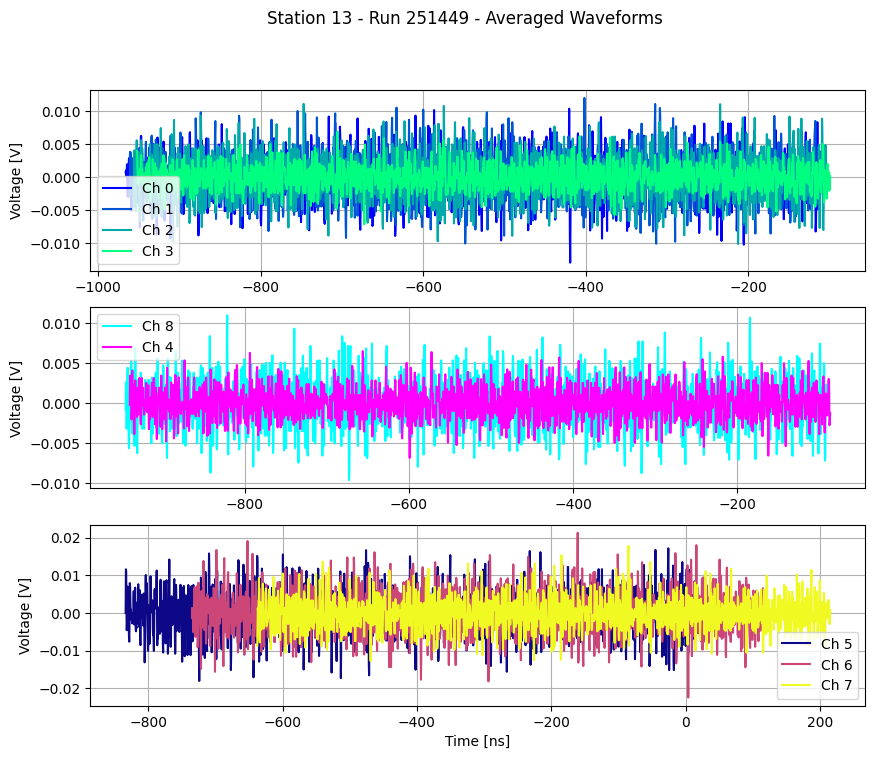

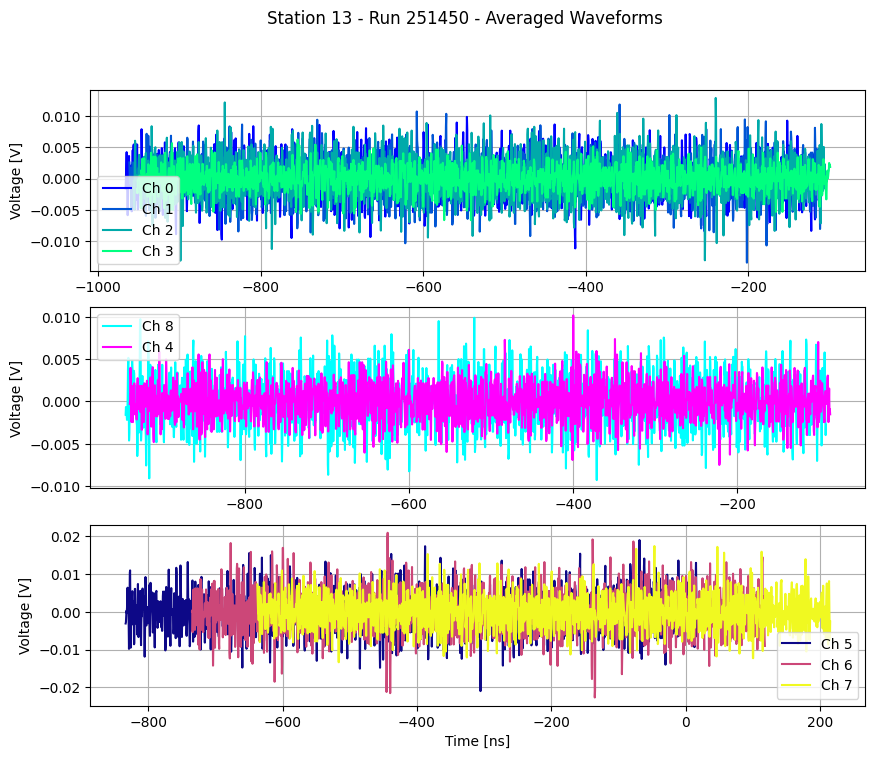

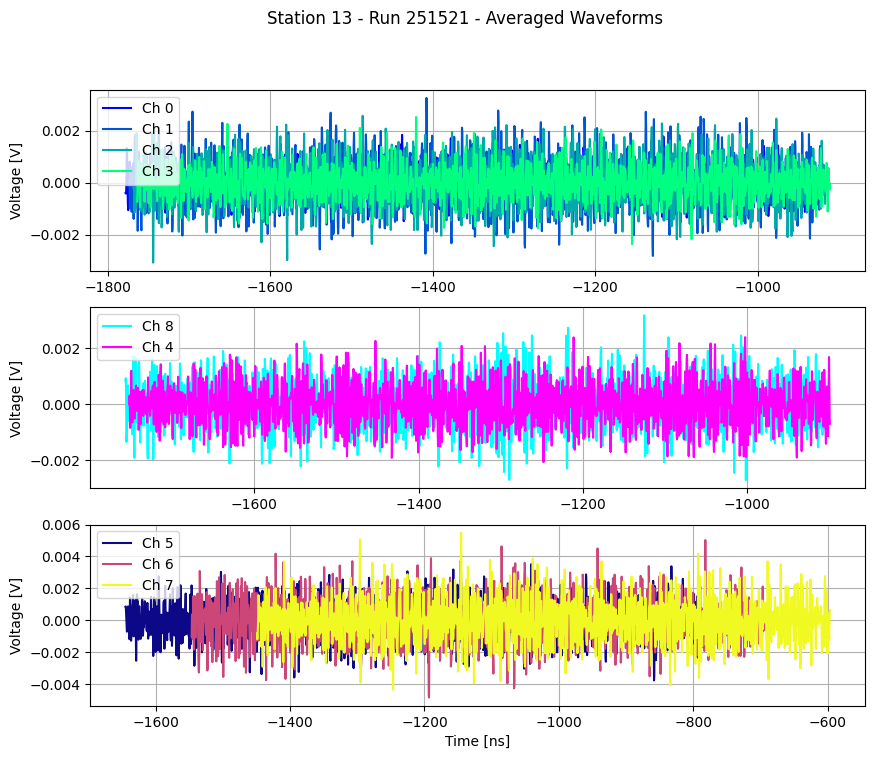

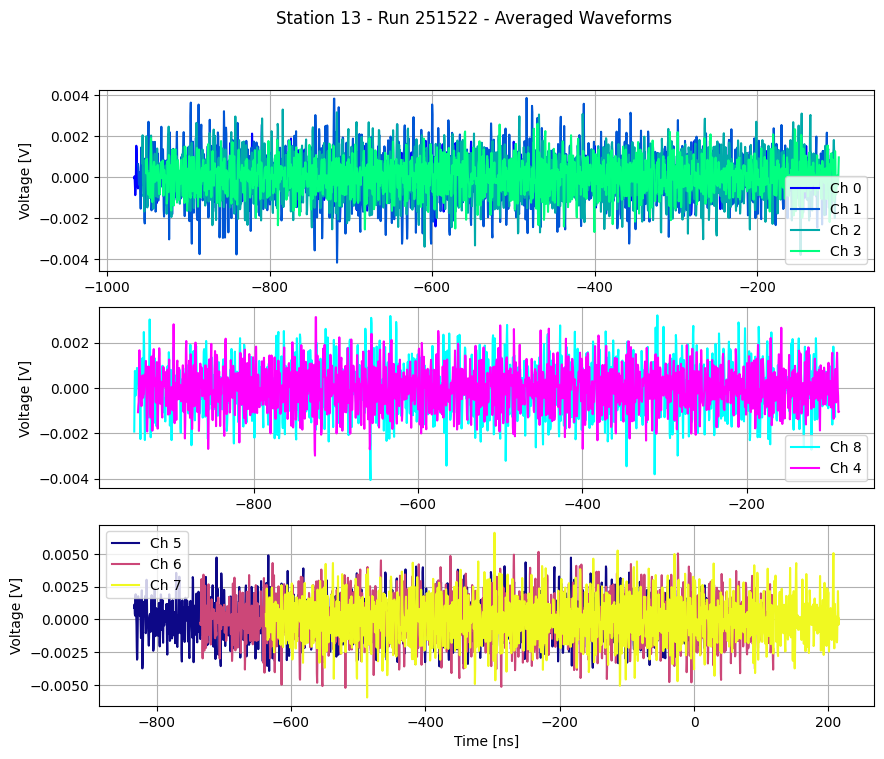

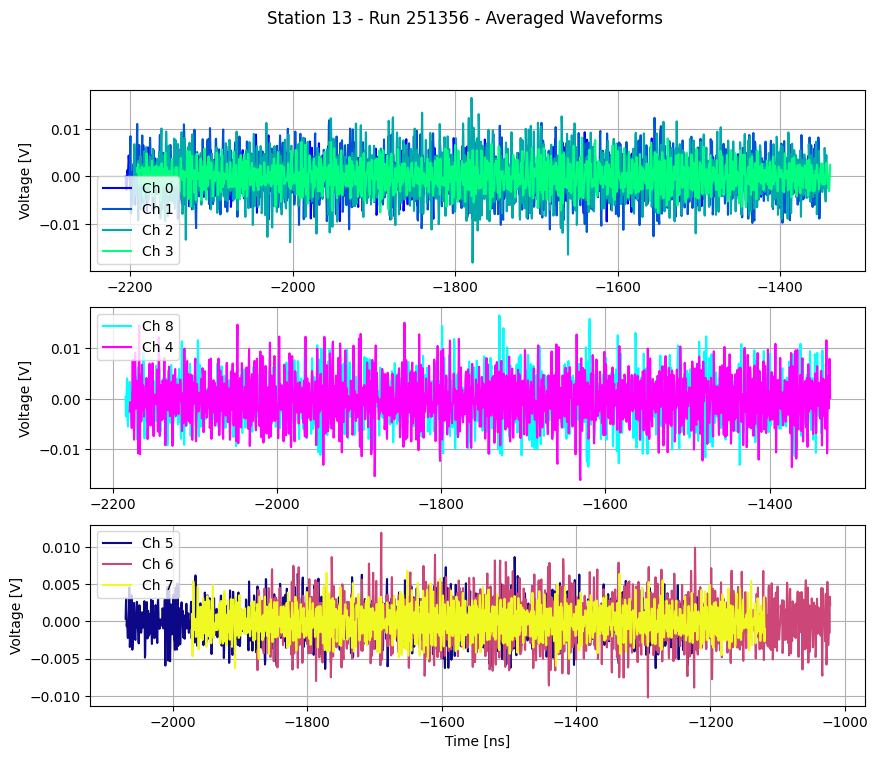

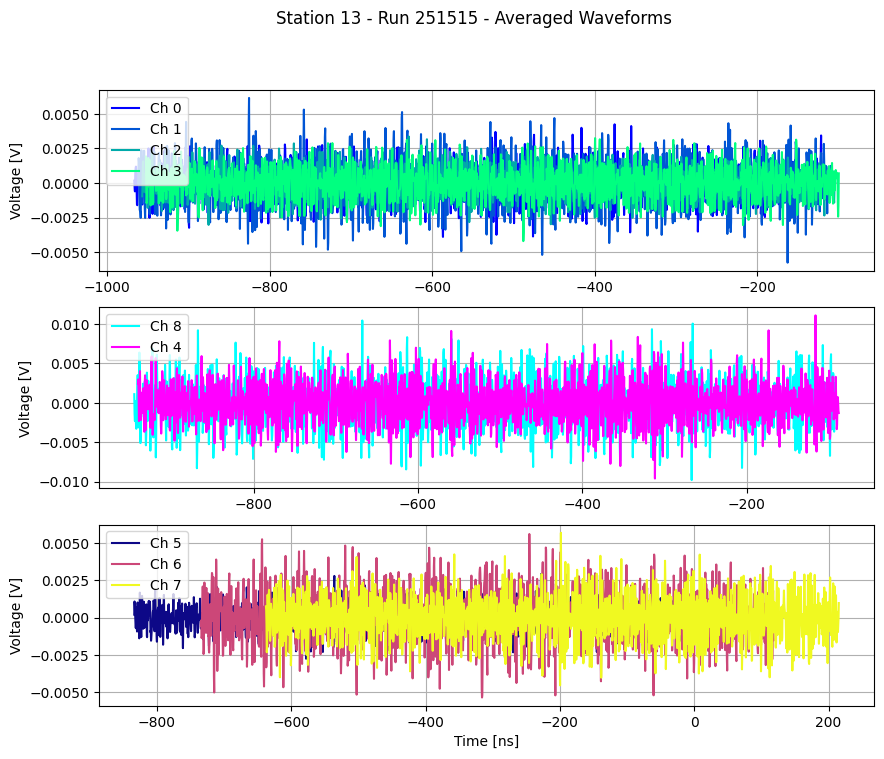

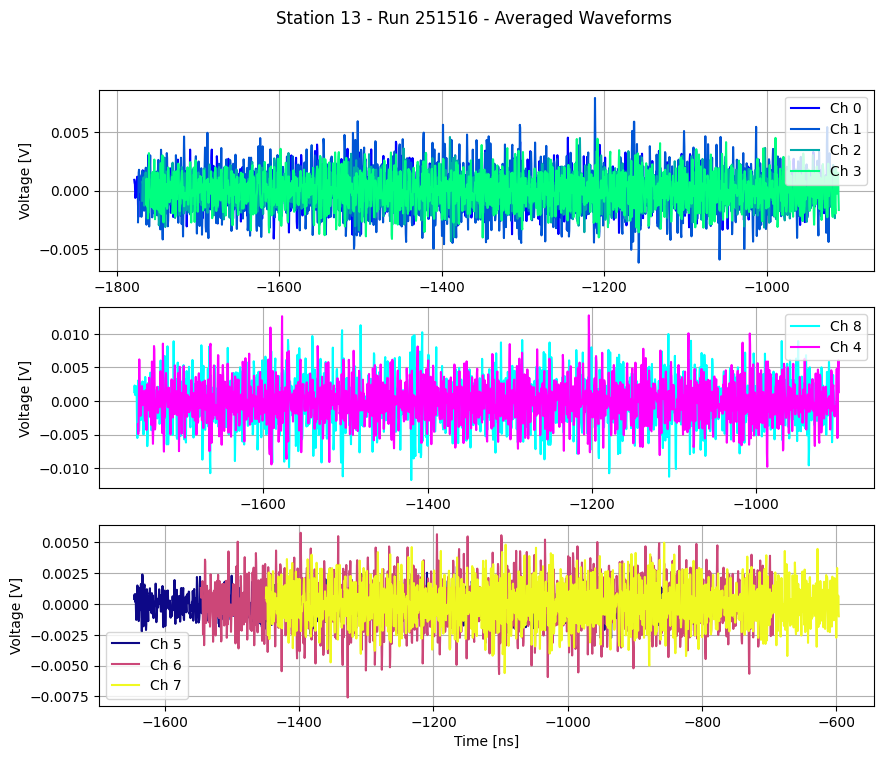

In [109]:
for i,run in enumerate(avg_volt.keys()):
    fig, ax = plt.subplots(3, 1, figsize=(10,8))
    plt.xlabel('Time [ns]')
    print(f'Plotting run: {run}')
    colors = cm.winter(np.linspace(0, 1, len(pa_chs)))
    for i, ch in enumerate(pa_chs):
        ax[0].plot(times[run][0][ch], avg_volt[run][ch], label=f'Ch {ch}', color=colors[i])

    colors = cm.cool(np.linspace(0, 1, len(hpols))) 
    for i, ch in enumerate(hpols):
        ax[1].plot(times[run][0][ch], avg_volt[run][ch], label=f'Ch {ch}', color=colors[i])

    colors = cm.plasma(np.linspace(0, 1, len(uvs))) 
    for i, ch in enumerate(uvs):
        ax[2].plot(times[run][0][ch], avg_volt[run][ch], label=f'Ch {ch}', color=colors[i])

    for i in range(3):
        ax[i].set_ylabel('Voltage [V]')
        ax[i].grid()
        ax[i].legend()
    plt.suptitle(f'Station {files[i][7:9]} - Run {run} - Averaged Waveforms')
    plt.savefig(f'station{files[i][7:9]}_run{run}_averaged_wfs.png')

## Pulser drops

In [6]:
in_dir = f'/data/user/sanyukta/rno_data/pulser_drops'
station_id = 14
sampling_rate = 2.4 * units.GHz
runs = [f for f in os.listdir(f'{in_dir}/st{station_id}') if f.endswith('.root')]

for run in runs:
    print(f'Processing run: {run}')
    input_dir = f'/data/user/sanyukta/rno_data/pulser_drops/st{station_id}/{run}'
    # reader = basic_read_root(input_dir, selectors=selector, sampling_rate=sampling_rate)
    # id = 0
    # for id,event in enumerate(reader.run()):
    #     id = id+ 1
    # print(f'Number of events in run {run}: {id}')
    events, times, volts = get_eventsvoltstraces(basic_read_root(input_dir, sampling_rate=sampling_rate), band_pass=1, pulse_filter=0, glitch_filter=0, cable_delay=0)
    cpevents, cptimes, cpvolts = get_eventsvoltstraces(basic_read_root(input_dir, selectors=selector, sampling_rate=sampling_rate), band_pass=1, pulse_filter=0, glitch_filter=0)
    print(f'Run: {run}, Number of events: {len(events)}, Number of cal-pulser events: {len(cpevents)}')

Processing run: station14_run500026_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500026_combined.root ......


WARNING - 2025-09-09 15:18:55,959 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:55,990 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>145% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:56,015 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>89% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:56,075 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>58% of Vrms), removing by fitting.



 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500026_combined.root ......
Run: station14_run500026_combined.root, Number of events: 57, Number of cal-pulser events: 9
Processing run: station14_run500006_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500006_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500006_combined.root ......


WARNING - 2025-09-09 15:18:56,791 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>51% of Vrms), removing by fitting.


Run: station14_run500006_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500019_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500019_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500019_combined.root ......


WARNING - 2025-09-09 15:18:56,873 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>51% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,023 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>188% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,035 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>125% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,047 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>106% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,059 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>89% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,071 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>125% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,082 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offse

Run: station14_run500019_combined.root, Number of events: 2, Number of cal-pulser events: 1
Processing run: station14_run500025_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500025_combined.root ......


WARNING - 2025-09-09 15:18:57,094 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>67% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,106 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>101% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,118 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>110% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,136 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>74% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,286 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>188% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,298 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>106% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:57,310 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offse


 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500025_combined.root ......
Run: station14_run500025_combined.root, Number of events: 16, Number of cal-pulser events: 5
Processing run: station14_run500001_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500001_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500001_combined.root ......
Run: station14_run500001_combined.root, Number of events: 3, Number of cal-pulser events: 0
Processing run: station14_run500000_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500000_combined.root ......


WARNING - 2025-09-09 15:18:57,729 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>175% of Vrms), removing by fitting.



 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500000_combined.root ......
Run: station14_run500000_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500013_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500013_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500013_combined.root ......
Run: station14_run500013_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500005_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500005_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500005_combined.root ......
Run: station14_run500005_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500002_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500002_combine

WARNING - 2025-09-09 15:18:58,577 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>75% of Vrms), removing by fitting.



 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500002_combined.root ......
Run: station14_run500002_combined.root, Number of events: 5, Number of cal-pulser events: 0
Processing run: station14_run500017_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500017_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500017_combined.root ......
Run: station14_run500017_combined.root, Number of events: 2, Number of cal-pulser events: 1
Processing run: station14_run500020_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500020_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500020_combined.root ......


WARNING - 2025-09-09 15:18:59,228 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>58% of Vrms), removing by fitting.


Run: station14_run500020_combined.root, Number of events: 3, Number of cal-pulser events: 1
Processing run: station14_run500018_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500018_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500018_combined.root ......
Run: station14_run500018_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500010_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500010_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500010_combined.root ......
Run: station14_run500010_combined.root, Number of events: 2, Number of cal-pulser events: 1
Processing run: station14_run500015_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500015_combined.root ......


WARNING - 2025-09-09 15:18:59,949 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>50% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:18:59,961 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>73% of Vrms), removing by fitting.



 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500015_combined.root ......
Run: station14_run500015_combined.root, Number of events: 4, Number of cal-pulser events: 0
Processing run: station14_run500016_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500016_combined.root ......


WARNING - 2025-09-09 15:19:00,471 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>59% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:00,501 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>65% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:00,558 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>66% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:00,576 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>56% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:00,594 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>103% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:00,612 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>121% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:00,686 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets


 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500016_combined.root ......


WARNING - 2025-09-09 15:19:01,283 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>56% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:01,324 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>52% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:01,359 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>54% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:01,388 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>68% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:01,581 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>88% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:01,593 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>66% of Vrms), removing by fitting.


Run: station14_run500016_combined.root, Number of events: 71, Number of cal-pulser events: 24
Processing run: station14_run500021_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500021_combined.root ......


WARNING - 2025-09-09 15:19:01,634 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>96% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:01,747 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>66% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:01,765 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>96% of Vrms), removing by fitting.



 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500021_combined.root ......
Run: station14_run500021_combined.root, Number of events: 10, Number of cal-pulser events: 3
Processing run: station14_run500008_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500008_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500008_combined.root ......
Run: station14_run500008_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500011_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500011_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500011_combined.root ......
Run: station14_run500011_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500004_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500004_combin

WARNING - 2025-09-09 15:19:02,520 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>56% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:02,690 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>100% of Vrms), removing by fitting.



 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500004_combined.root ......
Run: station14_run500004_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500014_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500014_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500014_combined.root ......
Run: station14_run500014_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500024_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500024_combined.root ......


WARNING - 2025-09-09 15:19:03,126 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>102% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,139 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>131% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,237 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>77% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,260 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>57% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,273 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>60% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,355 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>111% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,538 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offset


 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500024_combined.root ......


WARNING - 2025-09-09 15:19:03,586 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>77% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,604 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>57% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:03,617 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>60% of Vrms), removing by fitting.


Run: station14_run500024_combined.root, Number of events: 36, Number of cal-pulser events: 15
Processing run: station14_run500007_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500007_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500007_combined.root ......
Run: station14_run500007_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500009_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500009_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500009_combined.root ......
Run: station14_run500009_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500023_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500023_combined.root ......


WARNING - 2025-09-09 15:19:04,355 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>64% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:04,436 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>72% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:04,448 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>69% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:04,460 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>76% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:04,472 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>126% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:04,484 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>152% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:04,496 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets


 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500023_combined.root ......
Run: station14_run500023_combined.root, Number of events: 68, Number of cal-pulser events: 0
Processing run: station14_run500012_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500012_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500012_combined.root ......
Run: station14_run500012_combined.root, Number of events: 2, Number of cal-pulser events: 1
Processing run: station14_run500003_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500003_combined.root ......

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500003_combined.root ......
Run: station14_run500003_combined.root, Number of events: 1, Number of cal-pulser events: 0
Processing run: station14_run500022_combined.root

 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500022_combin

WARNING - 2025-09-09 15:19:06,182 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>71% of Vrms), removing by fitting.
WARNING - 2025-09-09 15:19:06,194 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>72% of Vrms), removing by fitting.



 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500022_combined.root ......
Run: station14_run500022_combined.root, Number of events: 6, Number of cal-pulser events: 1


In [13]:
run_num = 26
station_id = 14
sampling_rate = 2.4 * units.GHz
input_dir = f'/data/user/sanyukta/rno_data/pulser_drops/st{station_id}/station14_run5000{run_num}_combined.root'
cpevents, cptimes, cpvolts = get_eventsvoltstraces(basic_read_root(input_dir, selectors=selector, sampling_rate=sampling_rate), band_pass=1, pulse_filter=0, glitch_filter=0)
len(cpevents)


 reading /data/user/sanyukta/rno_data/pulser_drops/st14/station14_run500026_combined.root ......


9

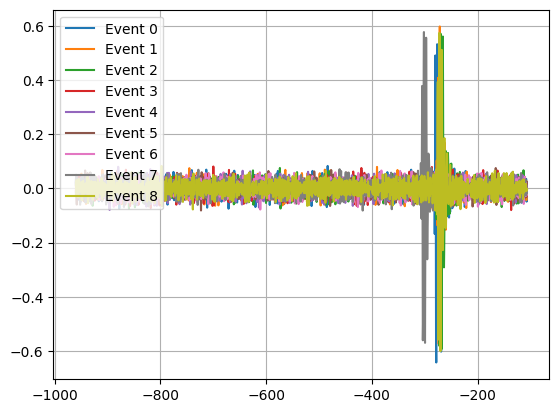

In [20]:
avg_volt = align_and_average_voltage_traces(cpvolts[0:8][7])
for eve in range(len(cpevents)):
    plt.plot(cptimes[eve][7], cpvolts[eve][7], label=f'Event {eve}')
plt.legend(loc='upper left')
plt.grid()